Step 1: Load Dataset, Libraries & Inspect

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("house-prices.csv")
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [3]:
# Show basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None


In [4]:
# Check for missing values
print(df.isnull().sum())

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


In [5]:
# Summary statistics
print(df.describe())

             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.500000  125950.000000  2000.000000    3.000000    2.000000   
75%     96.250000  148250.000000  2140.000000    3.000000    3.000000   
max    128.000000  211200.000000  2590.000000    5.000000    4.000000   

           Offers  
count  128.000000  
mean     2.578125  
std      1.069324  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      6.000000  


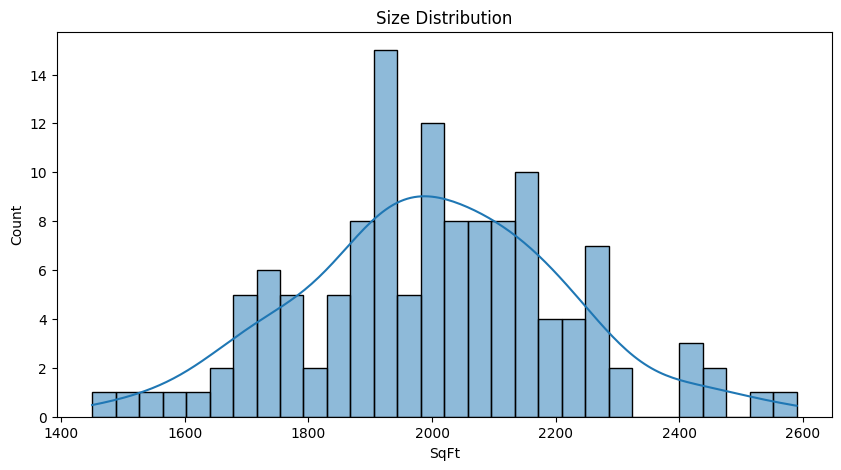

In [7]:
# Visualize distributions
plt.figure(figsize=(10,5))
sns.histplot(df['SqFt'], bins=30, kde=True)
plt.title('Size Distribution')
plt.show()

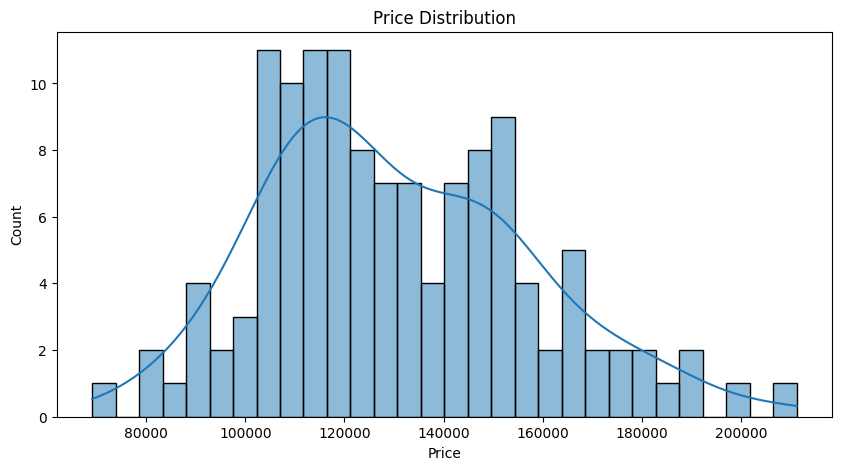

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

Step 2: Data Preprocessing

In [9]:
# Normalize Numerical Features

scaler = StandardScaler()
df[['SqFt', 'Price']] = scaler.fit_transform(df[['SqFt', 'Price']])

In [16]:
# Encode Categorical Data

df = pd.get_dummies(df, columns=['Brick','Neighborhood'], drop_first=True)

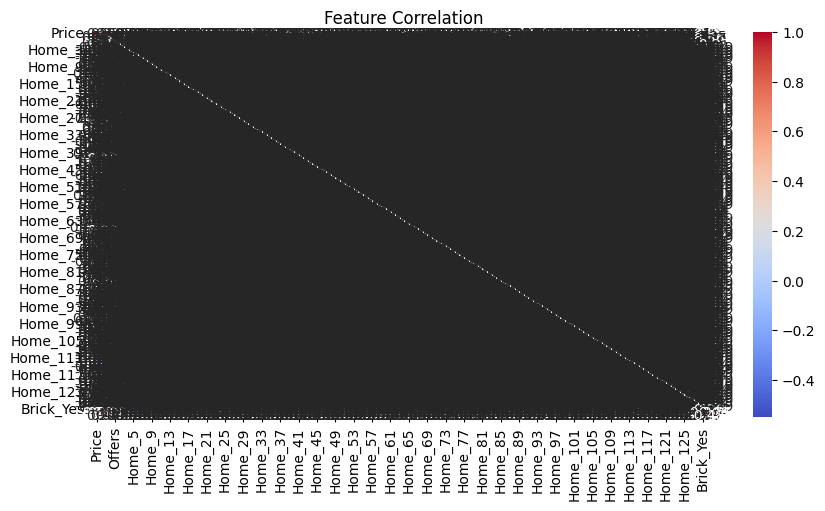

In [17]:
# Correlation Analysis

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

Step 3: Model Training

In [18]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Step 4: Model Evaluation

In [21]:
# Predictions

y_pred = model.predict(X_test)

In [22]:
# Performance Metrics

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 0.4465485449267695
R² Score: 0.757664310959668


In [23]:
# Feature Importance Insights

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by="Coefficient", ascending=False))

                   Coefficient
Home_104              1.150933
Home_68               0.910525
Home_94               0.760950
Neighborhood_West     0.698578
Home_26               0.561841
...                        ...
Home_98              -0.740823
Home_109             -0.751651
Home_29              -0.775871
Home_4               -0.838743
Home_18              -0.964968

[134 rows x 1 columns]
